In [195]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [317]:
import numpy as np
from src import classifier
from src.classifier import *
import json
from src.etl import *
import pickle
import run
from run import *

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [344]:
!python3 run.py all

['all']
load all data
Read Pre Trained Best Model
Performance on Training Set
              precision    recall  f1-score   support

           2       0.97      0.99      0.98      4929
           4       0.98      0.99      0.99      4978
           5       0.99      0.98      0.98      5019
           6       0.99      0.98      0.98      5058
           7       0.99      0.98      0.98      5016

    accuracy                           0.98     25000
   macro avg       0.98      0.98      0.98     25000
weighted avg       0.98      0.98      0.98     25000

use input model
Prediction Table saved at result/prediction_original.csv
use input model
prediction table save to result/transformer_without_class_transformed.csv
use input model
prediction table save to result/transformer_with_class_transformed_2.csv
use input model
prediction table save to result/transformer_with_class_transformed_4.csv
use input model
prediction table save to result/transformer_with_class_transformed_5.csv
use

In [197]:
with open('config/data-params.json', 'r') as fh:
    data_params = json.load(fh)
train_data, train_label, test_data, test_label = getData(**data_params)
print(train_data.shape, train_label.shape)

(25000, 3072) (25000,)


In [309]:
os.path.exists('result/prediction_original.csv')

True

In [211]:
# Test Function From the Folder

classifier.model_selelection_RandomForestClassifier(train_data, train_label, 
                                             depths=[10, 20, 30], 
                                             estimators=[100],
                                             min_samples_leaf = [5,10,20,40, 50]
                                            )

finish training experiment: 0
finish training experiment: 1
finish training experiment: 2
finish training experiment: 3
finish training experiment: 4
finish training experiment: 5
finish training experiment: 6
finish training experiment: 7
finish training experiment: 8
finish training experiment: 9
finish training experiment: 10
finish training experiment: 11
finish training experiment: 12
finish training experiment: 13
finish training experiment: 14
exp_id                     5
max_depth                 20
max_features            sqrt
min_samples_leaf           5
n_estimators             100
result              0.502514
Name: 5, dtype: object
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state'

RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=28)

In [212]:
# Read Model
model=clf_build(train_data, train_label, 'RandomForestClassifier')
# Produce report by class
clf_predict(model,train_data, train_label, 'result/prediction1.csv')
clf_predict(model,test_data, test_label, 'result/prediction1.csv')
# prediction on filtered data

Read Pre Trained Best Model
              precision    recall  f1-score   support

           2       0.97      0.99      0.98      4929
           4       0.98      0.99      0.99      4978
           5       0.99      0.98      0.98      5019
           6       0.99      0.98      0.98      5058
           7       0.99      0.98      0.98      5016

    accuracy                           0.98     25000
   macro avg       0.98      0.98      0.98     25000
weighted avg       0.98      0.98      0.98     25000

              precision    recall  f1-score   support

           2       0.47      0.49      0.48       964
           4       0.42      0.47      0.44       891
           5       0.54      0.57      0.56       942
           6       0.66      0.55      0.60      1194
           7       0.62      0.61      0.62      1009

    accuracy                           0.54      5000
   macro avg       0.54      0.54      0.54      5000
weighted avg       0.55      0.54      0.54      

array([4, 6, 6, ..., 5, 5, 7], dtype=int32)

In [215]:
# vote count:
vote_count=report_votes(train_data, model = 'result/best_rfc_model.sav')
#get count of the max vote
max_counts=vote_count.max(axis=1)
#get predicted label
predictions=np.array([2,4,5,6,7])[vote_count.argmax(axis=1)]



Read Pre Trained Best Model


In [273]:
#Make Prediction on given data, write result in table, save to given path
classifier.prediction_df(train_data, train_label, 
                         model = 'result/best_rfc_model.sav',
                        outdf_path = 'result/prediction_original.csv')

Read Pre Trained Best Model


,true_label,predicted_label,predict_vote,max_count
0,6,6,"[7.0, 6.0, 8.0, 74.0, 5.0]",74
1,4,4,"[5.0, 55.0, 2.0, 36.0, 2.0]",55
2,2,2,"[65.0, 14.0, 5.0, 12.0, 4.0]",65
3,7,7,"[4.0, 11.0, 4.0, 6.0, 75.0]",75
4,4,4,"[13.0, 79.0, 0.0, 7.0, 1.0]",79
...,...,...,...,...
24995,5,5,"[14.0, 5.0, 61.0, 16.0, 4.0]",61
24996,4,4,"[31.0, 39.0, 11.0, 12.0, 7.0]",39
24997,2,2,"[59.0, 9.0, 15.0, 7.0, 10.0]",59
24998,2,2,"[64.0, 18.0, 8.0, 3.0, 7.0]",64


In [285]:
#to read the saved prediction table
df=pd.read_csv('result/prediction_original.csv',index_col=0)
df
#to access predict_vote
df['predict_vote'].str[1:-2].str.split(',')

0            [7.0,  6.0,  8.0,  74.0,  5.]
1           [5.0,  55.0,  2.0,  36.0,  2.]
2          [65.0,  14.0,  5.0,  12.0,  4.]
3           [4.0,  11.0,  4.0,  6.0,  75.]
4           [13.0,  79.0,  0.0,  7.0,  1.]
                       ...                
24995      [14.0,  5.0,  61.0,  16.0,  4.]
24996     [31.0,  39.0,  11.0,  12.0,  7.]
24997      [59.0,  9.0,  15.0,  7.0,  10.]
24998       [64.0,  18.0,  8.0,  3.0,  7.]
24999    [17.0,  14.0,  10.0,  48.0,  11.]
Name: predict_vote, Length: 25000, dtype: object

In [308]:
path_to_transformed_data='data/temp/transformer_with_class/'
#make prediction table on all kinds of input
for i in [2,4,5,6,7]:
    #read in data from transformed
    trans_data=np.load(path_to_transformed_data+f'transformed_{i}.npy')
    classifier.prediction_df(trans_data, test_label, 
                         model = 'result/best_rfc_model.sav',
                        outdf_path = f'result/prediction_transformer{i}.csv')




Read Pre Trained Best Model
Read Pre Trained Best Model
Read Pre Trained Best Model
Read Pre Trained Best Model
Read Pre Trained Best Model


In [294]:
trans_data=np.load('data/temp/transformer_1/transformed_2.npy')
df=classifier.prediction_df(trans_data, test_label, 
                         model = 'result/best_rfc_model.sav',
                        outdf_path = 'result/prediction_transformer2.csv')

Read Pre Trained Best Model


In [ ]:
create_pred_table

In [301]:
df

,true_label,predicted_label,predict_vote,max_count
0,6,5,"[17.0, 21.0, 25.0, 19.0, 18.0]",25
1,6,6,"[22.0, 13.0, 20.0, 23.0, 22.0]",23
2,6,2,"[24.0, 20.0, 23.0, 14.0, 19.0]",24
3,5,6,"[12.0, 14.0, 24.0, 26.0, 24.0]",26
4,7,6,"[18.0, 16.0, 24.0, 28.0, 14.0]",28
...,...,...,...,...
4995,2,5,"[22.0, 16.0, 25.0, 13.0, 24.0]",25
4996,7,7,"[20.0, 17.0, 25.0, 9.0, 29.0]",29
4997,5,5,"[19.0, 25.0, 28.0, 12.0, 16.0]",28
4998,5,5,"[15.0, 20.0, 36.0, 19.0, 10.0]",36


In [307]:
#goes in Mean, for Plotting

df['correct'] =(df['true_label'] == df['predicted_label'])
df.groupby('true_label').mean(numeric_only=True)[['correct']]

,correct
true_label,
2,0.409
4,0.178
5,0.485
6,0.146
7,0.250


In [ ]:
def ()

In [ ]:
# read in data from greyscale 

# predict, save result

In [320]:
d = np.load('data/temp/transformer_with_class/transformed_2.npy')
d.shape

(5000, 3072)

In [328]:
fp='data/temp/transformer_with_class/transformed_2.npy'
fp.split('/')[-2]+'/'+fp.split('/')[-1].replace('npy', 'csv')

'transformer_with_class/transformed_2.csv'

In [342]:
data_fp_dict=run.filte_transport_data(None, None)
create_pred_table(data_fp_dict, model, test_label, result_fp = 'result/')

use input model
prediction table save to result/transformer_without_class_transformed.csv
use input model
prediction table save to result/transformer_with_class_transformed_2.csv
use input model
prediction table save to result/transformer_with_class_transformed_4.csv
use input model
prediction table save to result/transformer_with_class_transformed_5.csv
use input model
prediction table save to result/transformer_with_class_transformed_6.csv
use input model
prediction table save to result/transformer_with_class_transformed_7.csv
use input model
prediction table save to result/transformer_within_class_transformed_2.csv
use input model
prediction table save to result/transformer_within_class_transformed_4.csv
use input model
prediction table save to result/transformer_within_class_transformed_5.csv
use input model
prediction table save to result/transformer_within_class_transformed_6.csv
use input model
prediction table save to result/transformer_within_class_transformed_7.csv


{'filtered': 'data/temp/filtered/filtered.npy',
 'trans_without_class': 'result/transformer_without_class_transformed.csv',
 'trans_with_class': ['result/transformer_with_class_transformed_2.csv',
  'result/transformer_with_class_transformed_4.csv',
  'result/transformer_with_class_transformed_5.csv',
  'result/transformer_with_class_transformed_6.csv',
  'result/transformer_with_class_transformed_7.csv'],
 'trans_within_class': ['result/transformer_within_class_transformed_2.csv',
  'result/transformer_within_class_transformed_4.csv',
  'result/transformer_within_class_transformed_5.csv',
  'result/transformer_within_class_transformed_6.csv',
  'result/transformer_within_class_transformed_7.csv']}

### Sketch

In [272]:
np.array([1,2,3]).tolist()

[1, 2, 3]

In [241]:
vote_count.astype(str)

array([['7.0', '6.0', '8.0', '74.0', '5.0'],
       ['5.0', '55.0', '2.0', '36.0', '2.0'],
       ['65.0', '14.0', '5.0', '12.0', '4.0'],
       ...,
       ['59.0', '9.0', '15.0', '7.0', '10.0'],
       ['64.0', '18.0', '8.0', '3.0', '7.0'],
       ['17.0', '14.0', '10.0', '48.0', '11.0']], dtype='<U32')

In [238]:
pd.Series()

/var/folders/y9/kq138hps5jdgv8y5zls1m38h0000gn/T/ipykernel_1614/2031691219.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [239]:
df

,true_label,predicted_label,predict_vote
0,6,6,7.0
1,4,4,5.0
2,2,2,65.0
3,7,7,4.0
4,4,4,13.0
...,...,...,...
24995,5,5,14.0
24996,4,4,31.0
24997,2,2,59.0
24998,2,2,64.0


In [222]:
np.array([2,4,5,6,7])[vote_count.argmax(axis=1)]

array([6, 4, 2, ..., 2, 2, 6])

In [221]:
train_label

array([6, 4, 2, ..., 2, 2, 6], dtype=int32)

In [210]:
model=model
X_in = train_data
n_size = X_in.shape[0]

result_arr=np.zeros((n_size, 5))
for tree in model.estimators_:
    result = tree.predict(X_in)
    for idx in range(n_size):
        result_arr[idx][int(result[idx])]+=1
   

In [189]:
result_arr.shape

(25000, 5)

In [202]:
results =classifier.report_votes(train_data, model = model)

use input model


In [166]:
result.shape

(25000,)

In [161]:
train_label[0:1]

array([6], dtype=int32)

In [162]:
result_dic

array([ 8., 12.,  7., 66.,  7.])

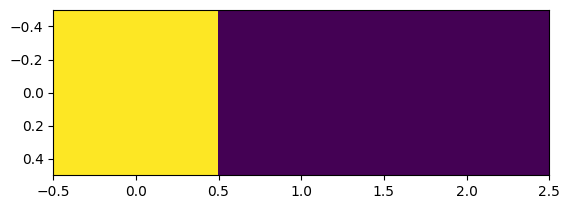

In [111]:
import matplotlib.pyplot as plt


image_todisplay = np.zeros

plt.imshow([(255, 0, 0)])
plt.show()

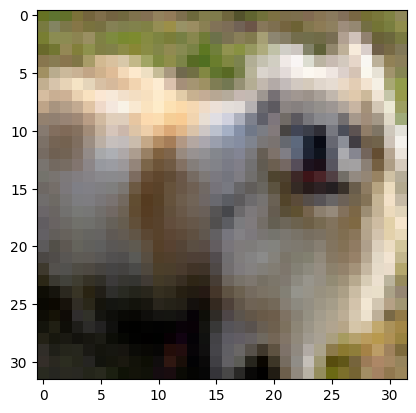

In [126]:
image=train_data[40].reshape((3,32,32))
image_todisplay = np.zeros((32,32,3))
for w in range(image_todisplay.shape[0]):
    for h in range(image_todisplay.shape[1]):
        for c in range(image_todisplay.shape[2]):
            image_todisplay[w][h][c]=image[c][w][h]
plt.imshow(image_todisplay.astype(int))
plt.show()

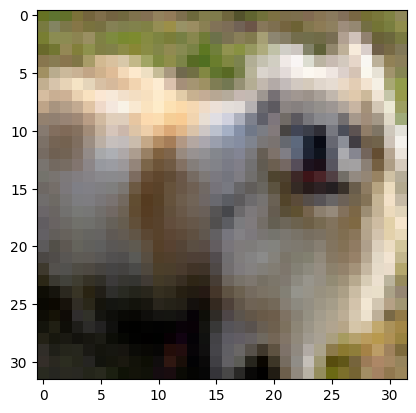

In [130]:
image=train_data[40].reshape((3, 1024))
image_todisplay = np.zeros((32,32,3))
for c in range(3):
    image_c=image[c].reshape(32,32)
    for w in range(image_todisplay.shape[0]):
        for h in range(image_todisplay.shape[1]):
            image_todisplay[w][h][c]=image_c[w][h]
plt.imshow(image_todisplay.astype(int))
plt.show()

In [135]:
def display_image(train_image):
    '''
    takes in array of a single image:
    1. image shape 3072 [array of r, array of g, array of b]
    2. image shape 3*32*32 or 3 * 1024 [[array of r], [array of g], [array of b]]
    '''
    image_todisplay = np.zeros((32,32,3))
    if train_image.shape[0] == 32*32*3:
        #reshape input array
        image=train_image.reshape((3,32,32))
        for w in range(image_todisplay.shape[0]):
            for h in range(image_todisplay.shape[1]):
                for c in range(image_todisplay.shape[2]):
                    image_todisplay[w][h][c]=image[c][w][h]
        plt.imshow(image_todisplay.astype(int))
        plt.show()
        
    elif train_image.shape[0] == 3:
        #loop through channel of input image
        for c in range(3):
            image_c=train_image[c].reshape(32,32)
            for w in range(image_todisplay.shape[0]):
                for h in range(image_todisplay.shape[1]):
                    image_todisplay[w][h][c]=image_c[w][h]
        plt.imshow(image_todisplay.astype(int))
        plt.show()
    else: 
        print('check in put shape, input shape is ', train_image.shape)
    return image_todisplay

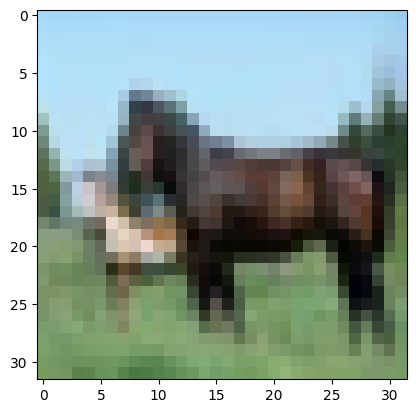

array([[[165.90361446, 218.13253012, 247.8313253 ],
        [163.85542169, 215.06024096, 243.73493976],
        [163.85542169, 215.06024096, 243.73493976],
        ...,
        [158.73493976, 213.01204819, 240.6626506 ],
        [154.63855422, 210.96385542, 238.61445783],
        [154.63855422, 205.84337349, 237.59036145]],

       [[170.        , 221.20481928, 248.85542169],
        [167.95180723, 218.13253012, 245.78313253],
        [167.95180723, 218.13253012, 245.78313253],
        ...,
        [165.90361446, 215.06024096, 241.68674699],
        [161.80722892, 211.98795181, 239.63855422],
        [159.75903614, 207.89156627, 238.61445783]],

       [[174.09638554, 223.25301205, 249.87951807],
        [172.04819277, 220.18072289, 246.80722892],
        [173.07228916, 221.20481928, 247.8313253 ],
        ...,
        [170.        , 215.06024096, 241.68674699],
        [166.92771084, 210.96385542, 238.61445783],
        [164.87951807, 209.93975904, 239.63855422]],

       ...,

      

In [139]:
image_12= (train_data[12])
image_12_norm = (image_12-image_12.min())/(image_12.max()-image_12.min())
display_image(image_12_norm*255)

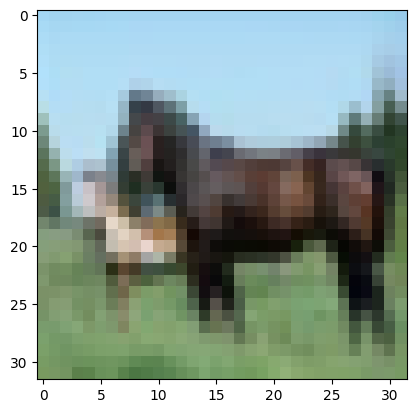

array([[[164., 215., 244.],
        [162., 212., 240.],
        [162., 212., 240.],
        ...,
        [157., 210., 237.],
        [153., 208., 235.],
        [153., 203., 234.]],

       [[168., 218., 245.],
        [166., 215., 242.],
        [166., 215., 242.],
        ...,
        [164., 212., 238.],
        [160., 209., 236.],
        [158., 205., 235.]],

       [[172., 220., 246.],
        [170., 217., 243.],
        [171., 218., 244.],
        ...,
        [168., 212., 238.],
        [165., 208., 235.],
        [163., 207., 236.]],

       ...,

       [[123., 160., 105.],
        [117., 154., 102.],
        [112., 149.,  99.],
        ...,
        [117., 136., 100.],
        [ 95., 115.,  79.],
        [120., 149., 100.]],

       [[120., 156., 100.],
        [116., 151.,  99.],
        [112., 147.,  96.],
        ...,
        [126., 149., 110.],
        [120., 144., 103.],
        [120., 152., 101.]],

       [[121., 154.,  96.],
        [120., 152.,  99.],
        [116., 1

In [136]:
display_image(train_data[12].reshape((3,32,32)))

((50000, 3072), (50000,))

In [27]:
#get model
rfc=classifier.models()["RandomForestClassifier"]

In [58]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 28,
 'verbose': 0,
 'warm_start': False}

In [29]:
#initiate result table
col_names = ['exp_id','max_depth','max_features','min_samples_leaf','n_estimators','result']
results = pd.DataFrame(columns =col_names )
results

,exp_id,max_depth,max_features,min_samples_leaf,n_estimators,result


In [38]:
rfc.fit(train_data,train_label)

RandomForestClassifier(random_state=28)

In [99]:
# Test Function From the Folder

classifier.model_selelection_RandomForestClassifier(train_data, train_label, 
                                             depths=[10,30], 
                                             estimators=[100],
                                             min_samples_leaf = [1, 100]
                                            )

finish training experiment: 0 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100, 'exp_id': 0, 'result': 0.4112}
finish training experiment: 1 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'n_estimators': 100, 'exp_id': 1, 'result': 0.38104}
finish training experiment: 2 {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100, 'exp_id': 2, 'result': 0.44132}
finish training experiment: 3 {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'n_estimators': 100, 'exp_id': 3, 'result': 0.38052}
exp_id                    2
max_depth                30
max_features           sqrt
min_samples_leaf          1
n_estimators            100
result              0.44132
Name: 2, dtype: object
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf

RandomForestClassifier(max_depth=30, random_state=28)

In [47]:
# To Save Model
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
print(loaded_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 28, 'verbose': 0, 'warm_start': False}


In [68]:
train_X, val_X, train_Y, val_Y = train_test_split(train_data,train_label, test_size=0.5, train_size=0.5, random_state=28)

In [84]:
# train, val split
train_X, val_X, train_Y, val_Y = train_test_split(
    train_data,train_label, test_size=0.5, train_size=0.5, random_state=28
    )


exp_id=0
depths=[10,20,50]
estimators=[100]

for max_depth in depths:
    for est in estimators:
        rfc=classifier.models()["RandomForestClassifier"]
        
        hyperparam={'max_depth':max_depth,
               'max_features':'sqrt','min_samples_leaf':1,
               'n_estimators':est}
        #print(hyperparam)
        rfc=rfc.set_params(**hyperparam)
        rfc.fit(train_X,train_Y)
        
        hyperparam['exp_id'] = exp_id
        hyperparam['result'] = rfc.score(val_X,val_Y)
        
        results.loc[exp_id]=hyperparam
        print(exp_id)
        exp_id+=1
        

1
2
3
4
5
6
7
8
9
10
11
12


In [85]:
rfc.score(val_X,val_Y)

0.45588

In [92]:
results.sort_values(by='result').iloc[-1][['max_depth','max_features','min_samples_leaf','n_estimators']].to_dict()

{'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [109]:
model=clf_build(None, None, 'RandomForestClassifier')
clf_predict(model,test_data, test_label, 'result/prediction1.csv')

Read Pre Trained Best Model
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1000
           1       0.52      0.55      0.53      1000
           2       0.39      0.34      0.36      1000
           3       0.33      0.27      0.30      1000
           4       0.39      0.41      0.40      1000
           5       0.44      0.40      0.42      1000
           6       0.47      0.57      0.51      1000
           7       0.53      0.46      0.49      1000
           8       0.59      0.61      0.60      1000
           9       0.49      0.56      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



array([5, 8, 8, ..., 5, 5, 7], dtype=int32)

In [249]:
df = pd.DataFrame(columns = [ 'true_label','predicted_label','predict_vote'])
df['true_label'] = train_label
df['predicted_label'] = predictions
df['predict_vote'] = np.arange(25000)

def put_in_count(idx):
    return vote_count[idx]
df['predict_vote'] = df['predict_vote'].apply(put_in_count)